# Partie 1 - Exploration des données

## Chargement des librairies et lecture du dataset

In [5]:
library(ggmap)
library(ggplot2)

API_key <- readLines("API.txt",n = 1)
options(repr.plot.width = 12, repr.plot.height = 6)


register_stadiamaps(key = API_key)

Warning message in readLines("API.txt", n = 1):
“incomplete final line found on 'API.txt'”


In [4]:
# Lire les données depuis le csv 
df <- read.csv("donnees-synop-essentielles-omm.csv", sep = ";", header = TRUE)

Warning message in file(file, "rt"):
“cannot open file 'donnees-synop-essentielles-omm.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


## Description quantitative des données

In [14]:
cat("Le dataset contient", nrow(df), "lignes (points de mesures) et", ncol(df), "colonnes (paramètres).\n")
cat("Il contient des données météo issues de", length(unique(df$ID.OMM.station)), "stations.\n")

cat("Les données débutent le", min(df$Date), "et se terminent le", max(df$Date), ".\n")

Le dataset contient 1719567 lignes (points de mesures) et 82 colonnes (paramètres).


Il contient des données météo issues de 62 stations.
Les données débutent le 2015-08-04T02:00:00+02:00 et se terminent le 2025-09-03T23:00:00+02:00 .
Les données débutent le 2015-08-04T02:00:00+02:00 et se terminent le 2025-09-03T23:00:00+02:00 .


## Répartition temporelle des données
On regarde l'étendue de nos données et les éventuels trous pour ne pas suranalyser des phénomènes plus tard (ex si on a un hiver de + dans les données, cela fausse nos moyennes de température)

In [15]:
annee <- as.numeric(format(as.Date(df$Date), "%Y"))
mois <- as.numeric(format(as.Date(df$Date), "%m"))

df$Annee <- annee
df$Mois <- mois

Cette représentation montre que les données sont globalement bien réparties sur les mois.


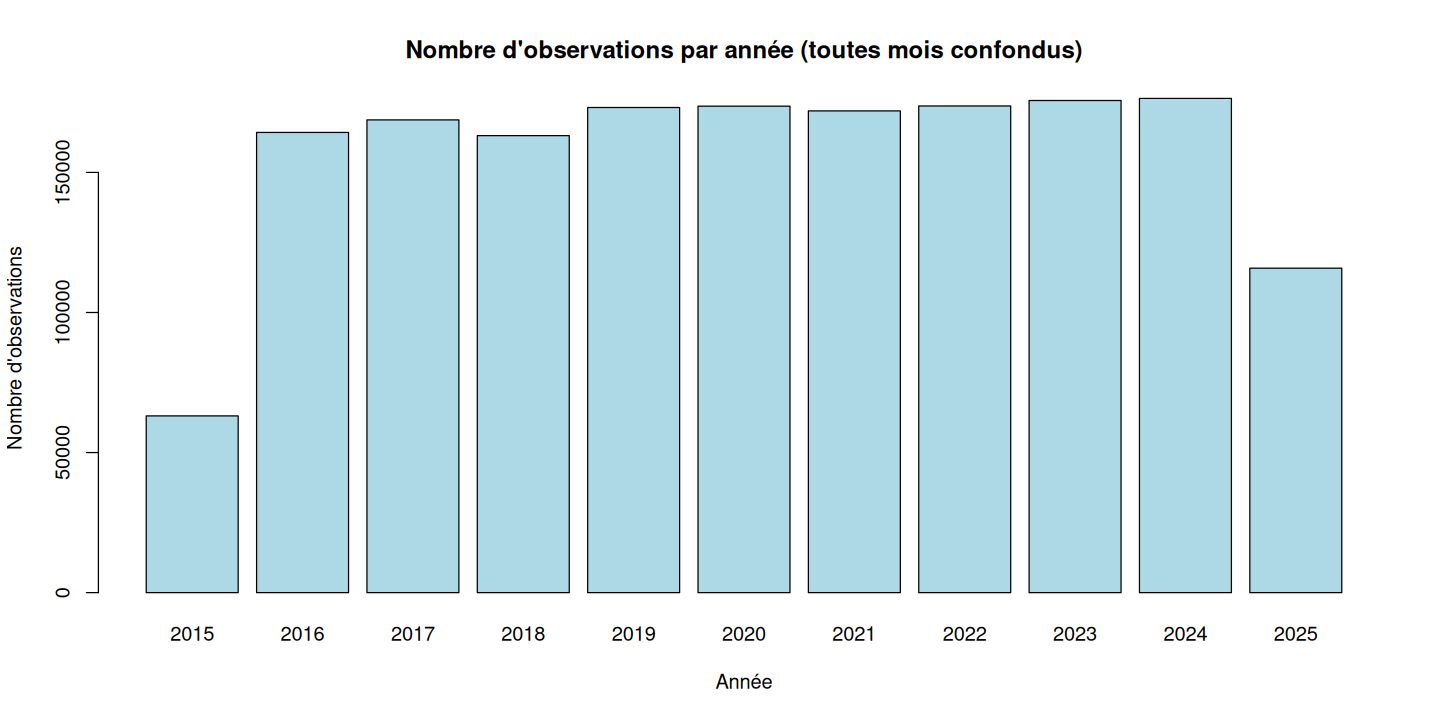

In [32]:
par(bg = "white")
barplot(table(annee),
        main = "Nombre d'observations par année (toutes mois confondus)",
        col = "lightblue",
        xlab = "Année",
        ylab = "Nombre d'observations")

cat("Cette représentation montre que les données sont globalement bien réparties sur les mois.\n")


En 2025 il est normal qu'il manque quelques mois  
En 2016 en revanche le nombre de données est plus faible. On doit vérifier si l'année est complète ou si quelques mois seulement sont représentés



En 2016, les mois représentés sont :  8 9 10 11 12 
En 2025, les mois représentés sont :  1 2 3 4 5 6 7 8 9 
En 2025, les mois représentés sont :  1 2 3 4 5 6 7 8 9 


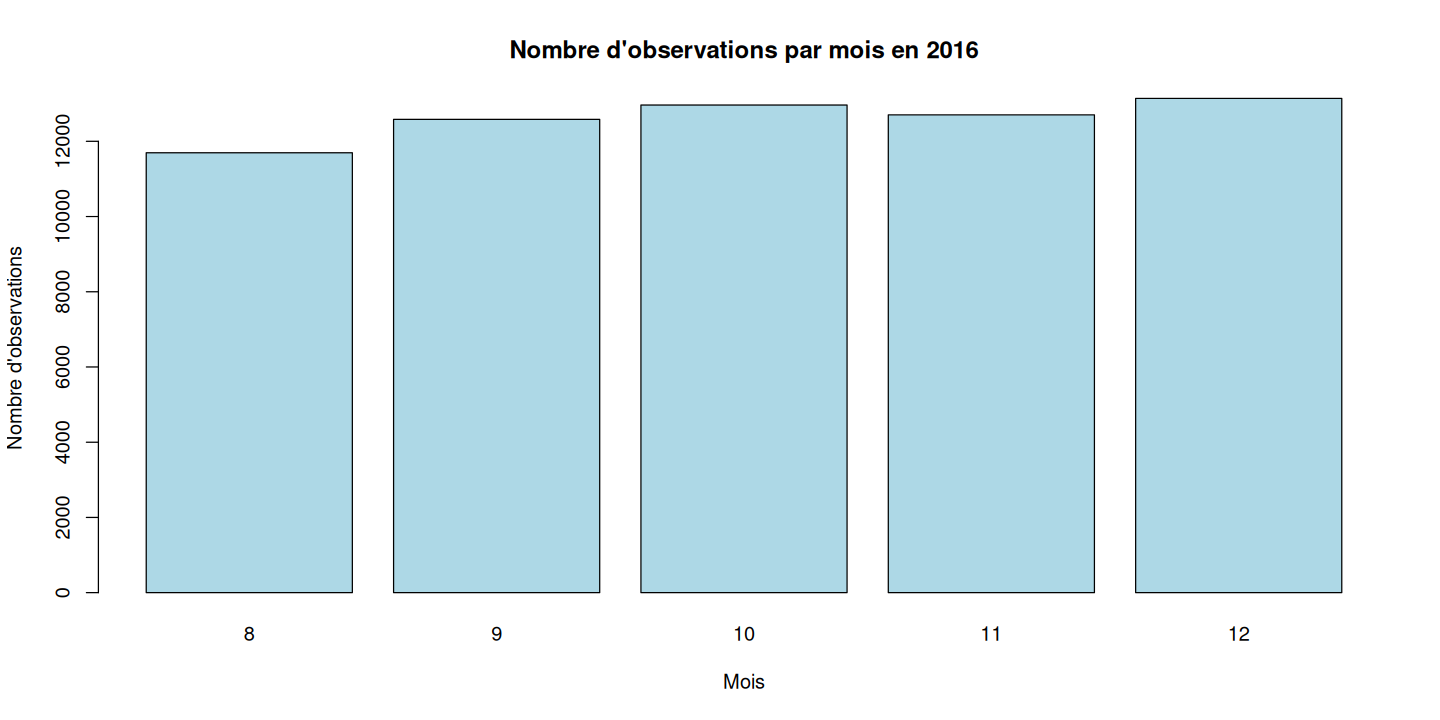

In [33]:
cat("En 2016, les mois représentés sont : ", sort(unique(mois[annee == 2015])), "\n")
cat("En 2025, les mois représentés sont : ", sort(unique(mois[annee == 2025])), "\n")

par(bg = "white")
barplot(table(mois[annee == 2015]),
        main = "Nombre d'observations par mois en 2016",
        col = "lightblue",
        xlab = "Mois",
        ylab = "Nombre d'observations")

On regarde désormais un point de vue global

Cette représentation montre que les données sont globalement bien réparties sur les mois.


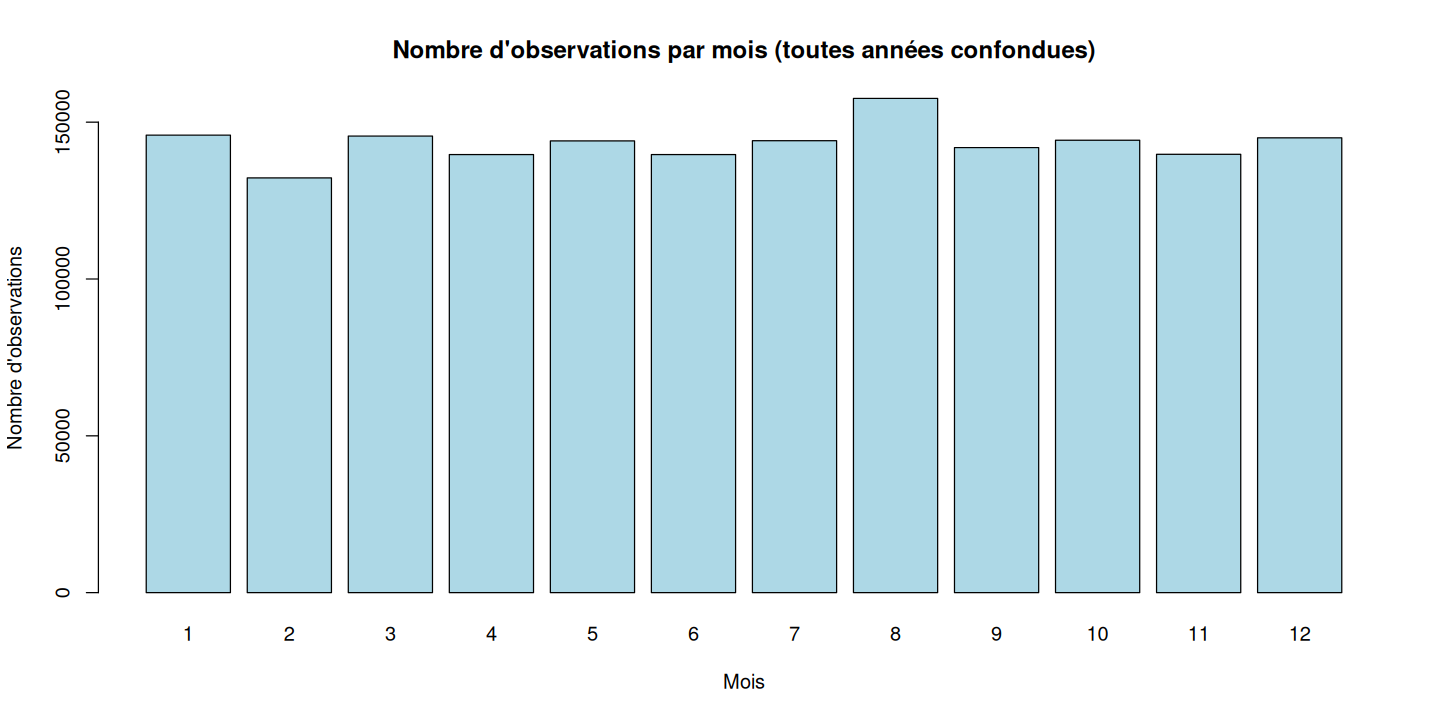

In [34]:
par(bg = "white")
barplot(table(mois),
        main = "Nombre d'observations par mois (toutes années confondues)",
        col = "lightblue",
        xlab = "Mois",
        ylab = "Nombre d'observations")

cat("Cette représentation montre que les données sont globalement bien réparties sur les mois.\n")

## Données géographiques

In [28]:
cat("Le dataset comporte",length(unique(df$communes..code.)), "communes différentes.\n")
cat("Le dataset comporte",length(unique(df$department..code.)), "départements différents.\n")
cat("Le dataset comporte",length(unique(df$region..code.)), "régions différentes.\n")

Le dataset comporte 59 communes différentes.
Le dataset comporte 53 départements différents.
Le dataset comporte 53 départements différents.
Le dataset comporte 22 régions différentes.
Le dataset comporte 22 régions différentes.


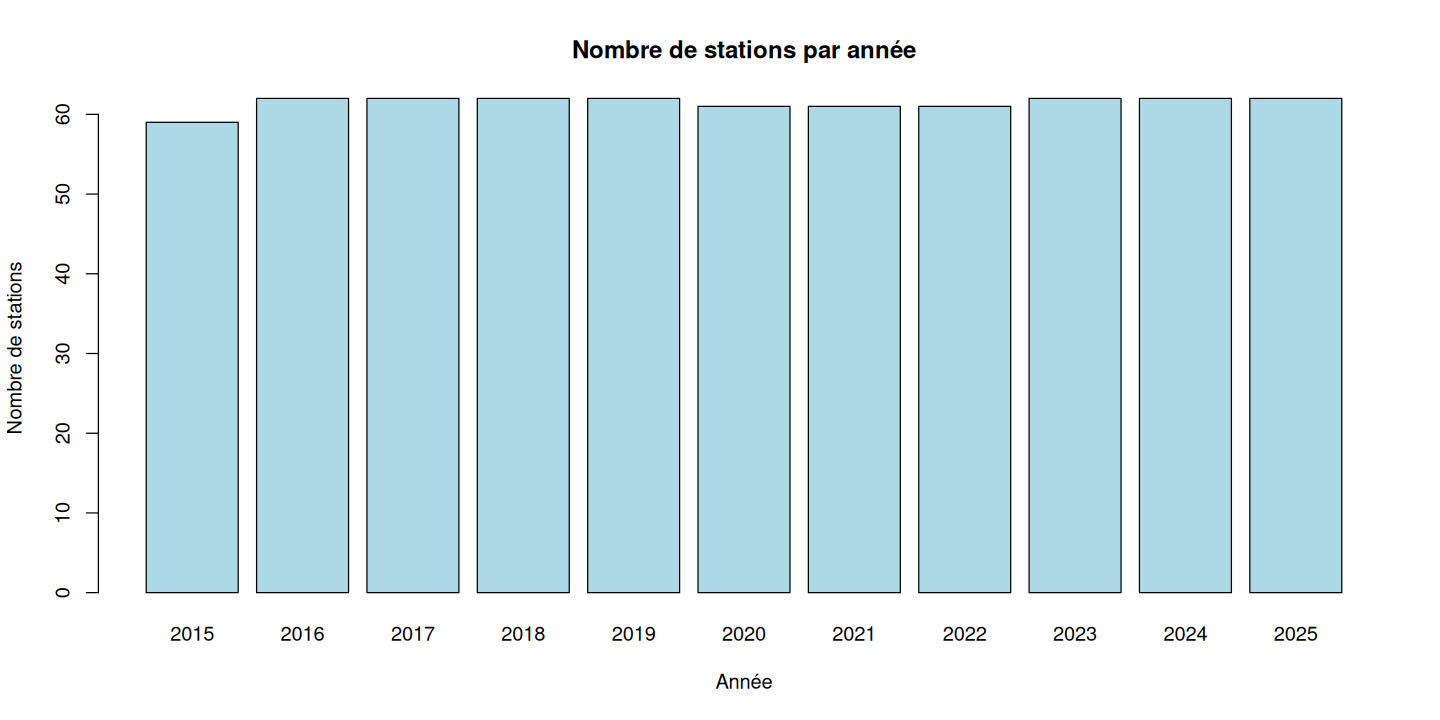

In [35]:
# Nombre de stations uniques par année
nb_stations <- tapply(df$ID.OMM.station, df$Annee, function(x) length(unique(x)))

par(bg = "white")
barplot(nb_stations,
        main = "Nombre de stations par année",
        col = "lightblue",
        xlab = "Année",
        ylab = "Nombre de stations")

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.



Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_point()`).”


Il y a 20 stations a priori hors de france métropolitaine

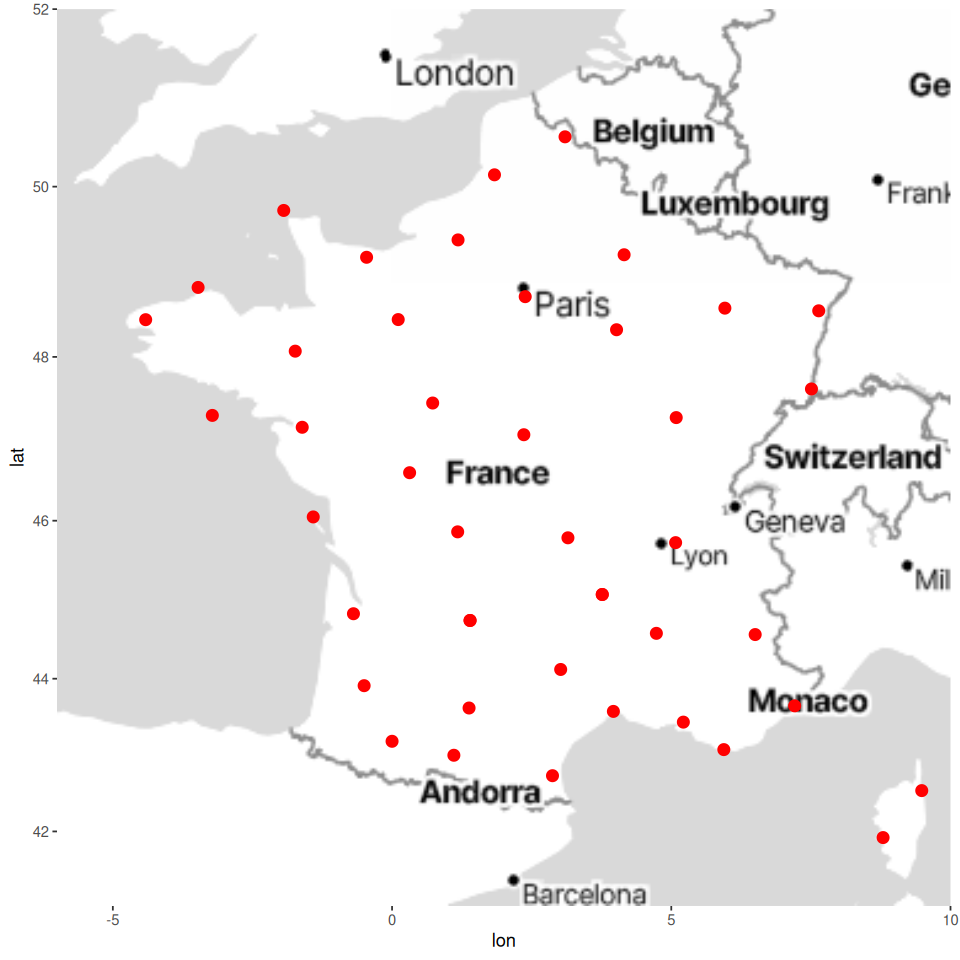

In [40]:
options(repr.plot.width = 8, repr.plot.height = 8)
fr_bbox <- c(left = -6, bottom = 41, right = 10, top = 52)
map <- get_stadiamap(bbox = fr_bbox, zoom = 5, maptype = "stamen_toner_lite")

stations <- unique(df[, c("Longitude", "Latitude")])

ggmap(map) +
geom_point(
    data = stations,
    aes(x = Longitude, y = Latitude),
    color = "red",
    size = 3
  )

cat("Il y a 20 stations a priori hors de france métropolitaine")
options(repr.plot.width = 12, repr.plot.height = 6)


## Qualité

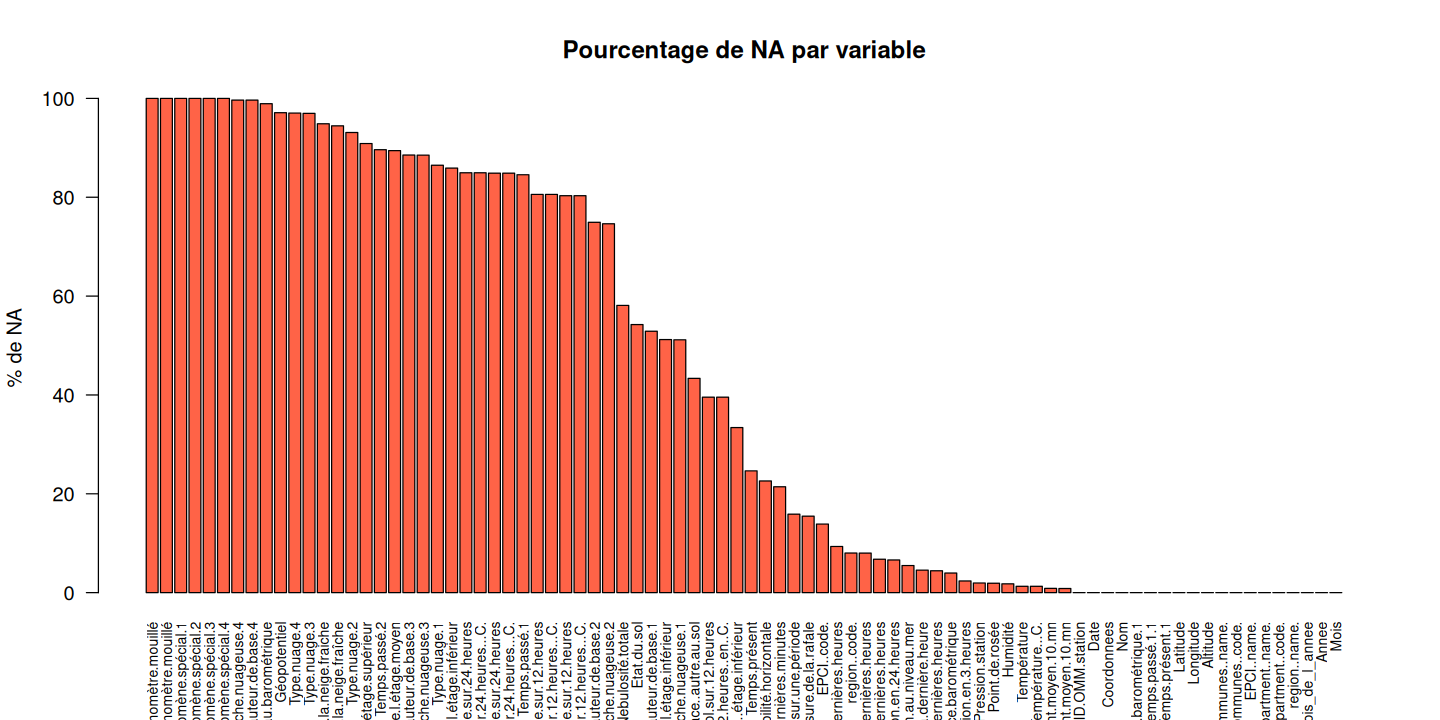

In [41]:
par(bg = "white")
options(repr.plot.width = 12, repr.plot.height = 6)

na_pct <- colMeans(is.na(as.data.frame(df))) * 100
na_pct <- sort(na_pct, decreasing = TRUE)

barplot(na_pct,
        main = "Pourcentage de NA par variable",
        col = "tomato",
        las = 2,
        ylab = "% de NA",
        cex.names = 0.7)

## Première Analyse

## Moyenne des températures par année - MAIGNAN
On enlève 2015 et 2025 qui ne sont pas complètes

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduits lors de la conversion automatique”
Warning message in min(x):
“aucun argument trouvé pour min ; Inf est renvoyé”
Warning message in max(x):
“aucun argument pour max ; -Inf est renvoyé”
Warning message in min(x):
“aucun argument trouvé pour min ; Inf est renvoyé”
Warning message in max(x):
“aucun argument pour max ; -Inf est renvoyé”


ERROR: Error in plot.window(...): 'xlim' nécessite des valeurs finies


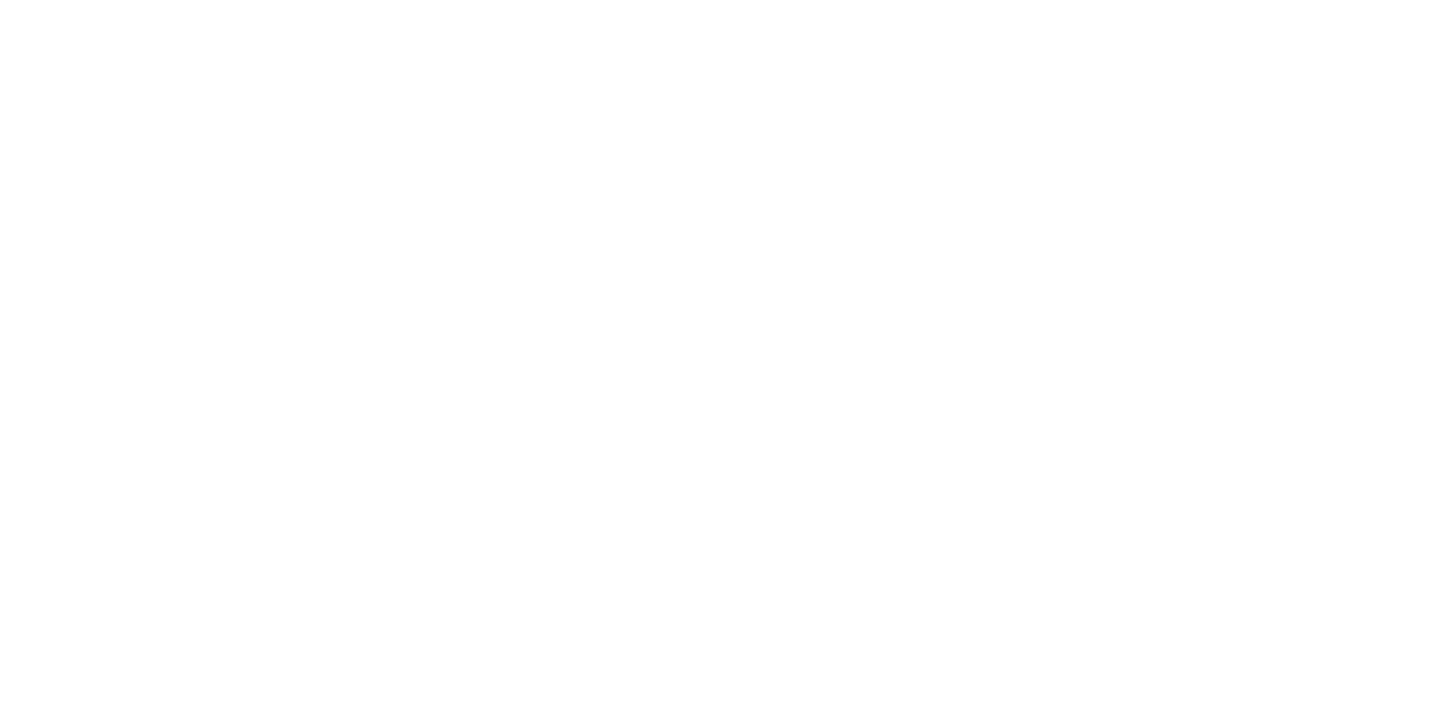

In [ ]:
df_subset <- df[, c("Date", "Température...C.")]
df_subset$Date <- format(as.POSIXct(df$Date, format="%Y-%m-%dT%H:%M:%S", tz="UTC"), "%Y")
df_clean <- na.exclude(df_subset)
df_clean <- df_clean[df_clean$Date != "", ]
df_clean <- df_clean[df_clean$Température...C. != "", ]


df_temp_annee <- aggregate(Température...C. ~ Date , data = df, FUN = mean, na.rm = TRUE)
par(bg = "white")
plot(df_temp_annee$Date, df_temp_annee$Température...C.)


## Comparaison Toulouse - Caen - Octavinho 

In [ ]:
df_caen <- df %>%
  filter(df$Commune == "Carpiquet")

df_toulouse <- df %>%
  filter(df$Commune == 'Blagnac')

dim(df_toulouse)

data_caen$Date <- as.Date(data_caen$Date)
data_toulouse$Date <- as.Date(data_toulouse$Date)

# Partie 2